In [1]:
#1, dowoload the data from http://www-personal.umich.edu/~mejn/cp/data/circular.txt
#2, using Fourier transform to process the image and figure out how to compress the data.
#3, compare it with the size which you obtained via plt.savefig()

[[ 0.99980001  0.99960003  0.99900017 ... -0.86014516 -0.84977285
  -0.83906065]
 [ 0.99920011  0.99900017  0.99840043 ... -0.86011443 -0.84974116
  -0.839028  ]
 [ 0.99820054  0.99800067  0.99740113 ... -0.86006322 -0.84968833
  -0.83897359]
 ...
 [-0.8601554  -0.86014516 -0.86011443 ...  0.05157697  0.03744188
   0.02328514]
 [-0.84978342 -0.84977285 -0.84974116 ...  0.03744188  0.02331348
   0.00916625]
 [-0.83907153 -0.83906065 -0.839028   ...  0.02328514  0.00916625
  -0.00496866]]


<function matplotlib.pyplot.show(close=None, block=None)>

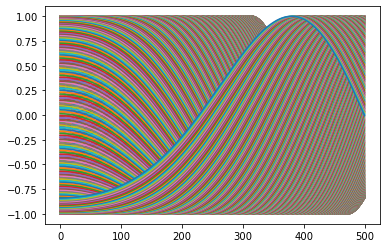

In [2]:
#pull data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv("http://www-personal.umich.edu/~mejn/cp/data/circular.txt", delimiter=" ")
data.dropna(axis=1, inplace=True)
data = np.array(data)

print(data)
plt.plot(data)
plt.show


500


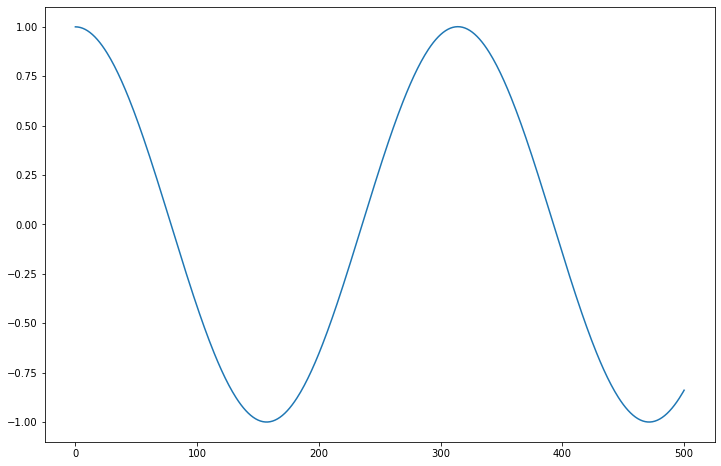

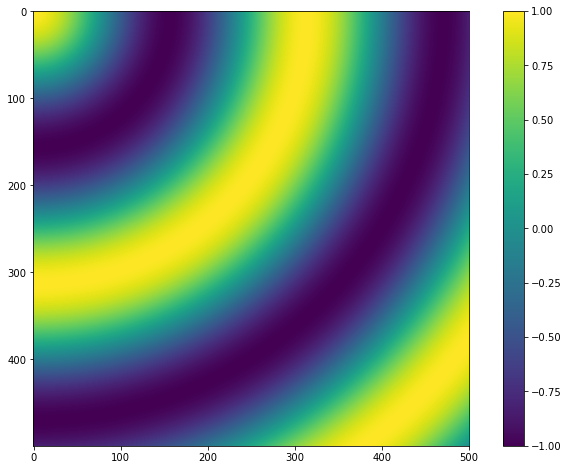

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D



#pull data
data = pd.read_csv("http://www-personal.umich.edu/~mejn/cp/data/circular.txt", delimiter=" ")
data.dropna(axis=1, inplace=True)
data = np.array(data)


x = np.linspace(0, 1, data.shape[0])
y = np.linspace(0, 1, data.shape[1])
c = np.fft.fft(data)



yf = np.fft.ifft(c)
print(len(yf))
plt.figure(figsize=[12, 8]) #blow up image
plt.plot(data[1])         
plt.show()

plt.figure(figsize=[12, 8]) #blow up image
plt.figure(1)
plt.imshow(data) #plot array
plt.colorbar()



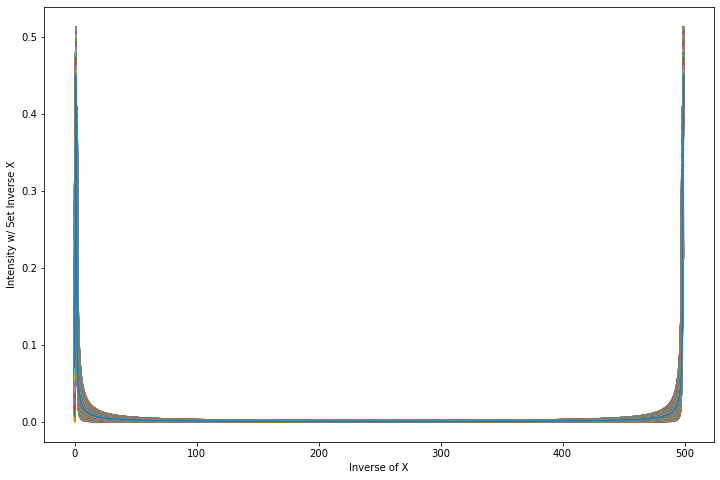

In [32]:
#fft2; inverted c
yf2 = np.fft.ifft2(c)

plt.figure(figsize=[12, 8]) #blow up image
plt.plot(np.abs(yf2))
plt.xlabel("Inverse of X")
plt.ylabel('Intensity w/ Set Inverse X')
plt.show()

E:\zthel\Documents\ANACONDA\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'y')

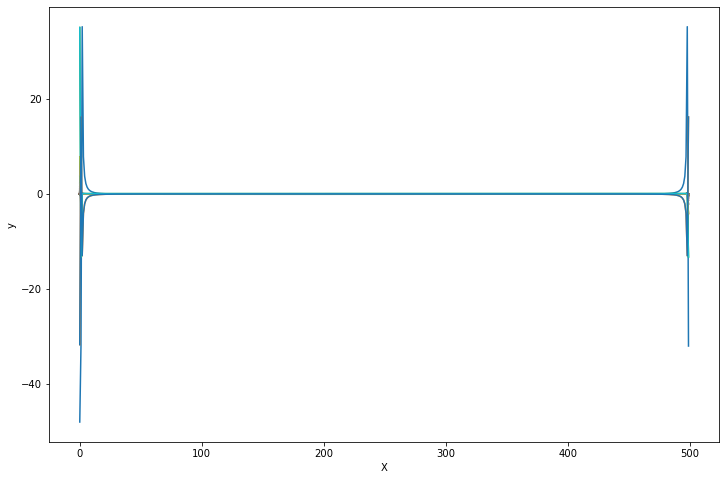

In [26]:
yf3 = np.fft.fft(yf2.real)
plt.figure(figsize=[12, 8])
plt.plot(yf3)
plt.xlabel("X")
plt.ylabel("y")

In [37]:
def dft1(data):
    '''
    This is DFT
    '''    
    N = len(data)
    c = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            c[k] += data[n]*exp(-2j*pi*k*n/N)
def dft2(y):
    '''
    This is FFT
    '''
    x = np.asarray(y, dtype=float)        #N*1 array
    N = y.shape[0]
    n = np.arange(N)                      #1*N array
    k = n.reshape((N, 1))                 #N*1 array
    M = np.exp(-2j * np.pi * k * n / N)   #N*N matrix
    return np.dot(M, x)                   #N*1 array

In [38]:
%timeit dft2(data)
%timeit np.fft.fft(data)

26 ms ± 513 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
10.8 ms ± 5.47 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
